# EXERCICE 7 : Regression logistique
## QUESTION) 
Il semble qu'un traitement (colonne Treatment) ait un effet sur une variable de "./RealMedicalData2.csv".

Utilisez 'sklearn.linear_model.LogisticRegression' pour trouver quelle est cette variable.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from IPython.display import display

In [2]:
dataframe=pd.read_csv("./data/RealMedicalData2.csv",sep=';',decimal=b',')
dataframe.head()

,Acid 1 density,Acid 2 density,Acid 3 density,Cells 1 density,Cells 2 density,Pressure 1,Pressure 2,Bio-marker 1,Bio-marker 2,Biomarker 3,Biomarker 4,Biomarker 5,Biomarker 6,Biomarker 6.1,Biomarker 7,Biomarker 8,Biomarker 9,Biomarker 10,Disease progression,Treatment
0,11.6,6.4,4.3,7.2,14.4,19.26,39.32,50.00,13.040000,0.20,0.0440,2.44,2.209,9.02,0.26,1.23,3.56,16.91,6,1
1,15.5,10.5,4.9,6.9,13.7,8.57,36.78,22.57,18.713333,0.51,0.8501,2.32,0.339,22.43,0.10,0.56,7.06,-3.47,6,2
2,15.3,6.5,4.2,6.4,13.6,13.48,25.90,8.25,8.246667,0.27,0.9629,2.83,0.339,17.94,0.13,0.59,3.20,10.05,10,1
3,13.4,7.7,4.1,5.8,14.2,15.23,44.36,11.09,11.093333,0.67,-0.2756,5.06,1.611,11.38,0.20,0.88,4.33,-3.62,18,2
4,16.0,5.2,3.2,5.7,12.8,8.37,19.62,7.44,6.386667,0.24,-0.6928,1.59,0.659,8.56,0.27,1.20,4.57,1.56,7,1


In [3]:
listColNames=list(dataframe.columns)
listColNames

[&#39;Acid 1 density&#39;,
 &#39;Acid 2 density&#39;,
 &#39;Acid 3 density&#39;,
 &#39;Cells 1 density&#39;,
 &#39;Cells 2 density&#39;,
 &#39;Pressure 1&#39;,
 &#39;Pressure 2&#39;,
 &#39;Bio-marker 1&#39;,
 &#39;Bio-marker 2&#39;,
 &#39;Biomarker 3&#39;,
 &#39;Biomarker 4&#39;,
 &#39;Biomarker 5&#39;,
 &#39;Biomarker 6&#39;,
 &#39;Biomarker 6.1&#39;,
 &#39;Biomarker 7&#39;,
 &#39;Biomarker 8&#39;,
 &#39;Biomarker 9&#39;,
 &#39;Biomarker 10&#39;,
 &#39;Disease progression&#39;,
 &#39;Treatment&#39;]

In [4]:
logistic_reg = LogisticRegression()
?logistic_reg

Type:        LogisticRegression
String form: LogisticRegression()
File:        /mnt/storage/software/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py
Docstring:  
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the &#39;multi_class&#39; option is set to &#39;ovr&#39;, and uses the
cross-entropy loss if the &#39;multi_class&#39; option is set to &#39;multinomial&#39;.
(Currently the &#39;multinomial&#39; option is supported only by the &#39;lbfgs&#39;,
&#39;sag&#39;, &#39;saga&#39; and &#39;newton-cg&#39; solvers.)

This class implements regularized logistic regression using the
&#39;liblinear&#39; library, &#39;newton-cg&#39;, &#39;sag&#39;, &#39;saga&#39; and &#39;lbfgs&#39; solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other in

In [37]:
def logistic_regression(df, grpname='Treatment'):
    logistic_reg = LogisticRegression()
    listValNames = listColNames[:-2] # remove treatment and Disease progression
    logistic_reg.fit(df[listValNames], df[grpname])
    # print(f"{logistic_reg.coef_=}")
    betas = dict()
    for index, val in enumerate(listValNames):
        betas[val] = logistic_reg.coef_[0][index]
        # print(f"{val=}, \tbeta=\t{logistic_reg.coef_[0][index]}")

    sort_betas = {k: v for k, v in sorted(betas.items(), key=lambda item: item[1])}  
    for k, v in sort_betas.items():
        print(f"{k}: {v}")

    n = len(sort_betas)
    impact_valname = list(sort_betas.keys())[n-1]
    print(f"\n\tFound that {impact_valname} is very impacted by {grpname}")

    return (logistic_reg, impact_valname)



Biomarker 4: -0.34279458507954613
Cells 1 density: -0.33029225094097714
Acid 3 density: -0.20350130722177565
Biomarker 7: -0.19769696268547718
Pressure 2: -0.1691506206278587
Acid 1 density: -0.16355444913988662
Biomarker 10: -0.15035155766617006
Bio-marker 1: -0.10361291511708025
Biomarker 9: 0.01790124737773036
Bio-marker 2: 0.041400349889343865
Biomarker 6.1: 0.11514234766153257
Cells 2 density: 0.144771227452019
Acid 2 density: 0.2520036628810978
Biomarker 8: 0.2850851995290235
Pressure 1: 0.31667707851635335
Biomarker 5: 0.4746382641623129
Biomarker 6: 0.8280754643198796
Biomarker 3: 2.1094592863778923

	Found that Biomarker 3 is very impacted by Treatment


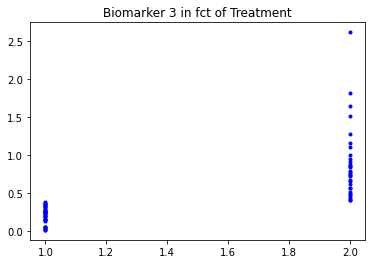

In [42]:
grpname = 'Treatment'
lr_med, valname = logistic_regression(dataframe, grpname)

fig = plt.figure()
plt.plot(dataframe[grpname], dataframe[valname], 'b.')
plt.title(f"{valname} in fct of {grpname}")
plt.show()